# Graficas del blog #1

## Pendientes
 - [ ] REalizar una grafica lineal para distintos rho y un solo epsilon
 - [ ] Iniciar el git

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker, cm, colors
from scipy.interpolate import make_interp_spline, BSpline
plt.rcParams["figure.figsize"] = (8,6)

##  Condiciones de Bannister

La ecuación a graficar es ésta: 

![](graf_1_crit_val_bannister.png)

La idea es utilizar valores típicos de rho para mostrar que la relación se cumple.

### Calculo de las constantes de propagación en el aire y en el suelo

$$ \gamma_g = \sqrt{j \omega \mu_0 (\sigma_g + j \omega \varepsilon_0 \varepsilon_g)} $$

$$ \gamma_0 = j \omega \sqrt{ \mu_0  \varepsilon_0} $$

In [6]:
e0 = 8.85418781e-12 #pF/m (picofarads per meter)
u0 = 1.256637062e-6 #μH/m (microhenries per meter)

f = np.logspace(0,7,100)
w = 2*np.pi*f
g0 = 1j * w * np.sqrt(u0*e0)
sigma_g =1 / 100.0
eg = 10.0
gg = np.sqrt(1j * w * u0 *(sigma_g + 1j * w * e0 * eg))
cond_bannister_100 = np.abs((g0 / gg) ** 2)

In [7]:
sigma_g =1 / 500.0
gg = np.sqrt(1j * w * u0 *(sigma_g + 1j * w * e0 * eg))
cond_bannister_500 = np.abs((g0 / gg) ** 2)

In [8]:
sigma_g =1 / 1000.0
gg = np.sqrt(1j * w * u0 *(sigma_g + 1j * w * e0 * eg))
cond_bannister_1000 = np.abs((g0 / gg) ** 2)

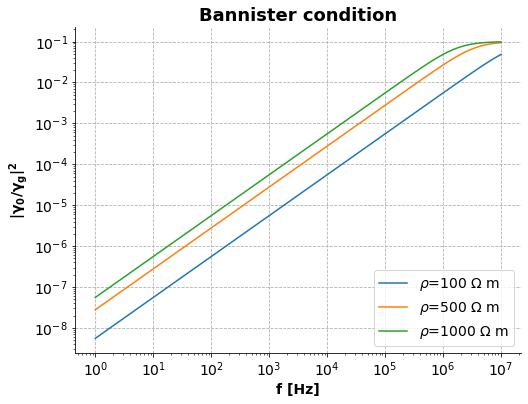

In [36]:
fig, ax = plt.subplots()
ax.plot(f, cond_bannister_100, label = r'$\rho$=100 $\Omega$ m')
ax.plot(f, cond_bannister_500, label = r'$\rho$=500 $\Omega$ m')
ax.plot(f, cond_bannister_1000, label = r'$\rho$=1000 $\Omega$ m')
ax.set_ylabel('$\mathbf{\|\gamma_0 / \gamma_g \|^2}$',fontsize=14, weight='semibold')
ax.set_xlabel('f [Hz]',fontsize=14, weight='semibold')
ax.set_title('Bannister condition',fontsize=18, weight='semibold')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(ls='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=14,loc='lower right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('bannister_condition.png', dpi = 300, bbox_inches='tight')
#ax.set_xlabel('test', fontize=20)


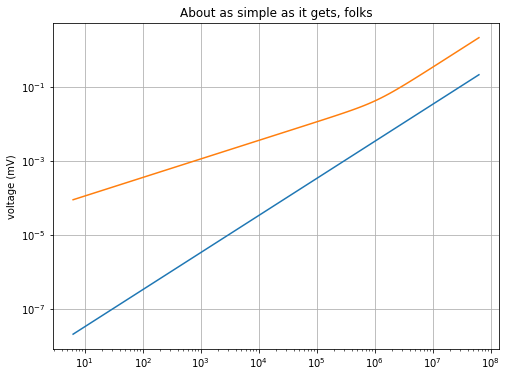

In [17]:
fig, ax = plt.subplots()
ax.plot(w, np.abs(g0), label = 'g0')
ax.plot(w, np.abs(gg), label = 'gg')
ax.set(ylabel='voltage (mV)',
       title='About as simple as it gets, folks',)
ax.set_xscale('log')
ax.set_yscale('log')
1#ax.set_xlabel('test', fontize=20)
ax.grid()

## Error magnetic field

![](tab1_cooray.png)

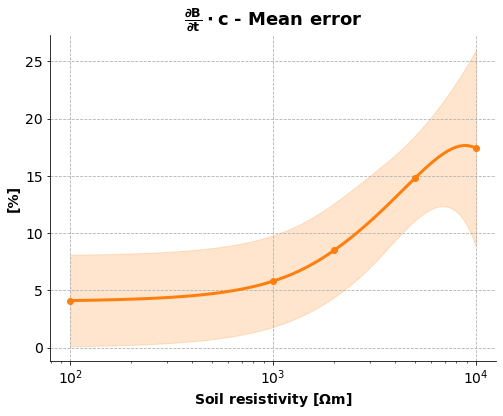

In [32]:
x = np.array([0.01, 0.001, 0.0005, 0.0002, 0.0001])
rho = 1/x
y = np.array([4.1, 5.8, 8.5, 14.8, 17.4])
y_err = np.array([4.0, 4.0, 4.1, 3.7, 8.6])


xnew = np.logspace(2, 4, 100) 
spl = make_interp_spline(rho, y, k=3)
spl_err = make_interp_spline(rho, y_err, k=2)
y_smooth = spl(xnew)
y_smooth_err = spl_err(xnew)

fig, ax = plt.subplots()
#ax.plot(rho, y, '-')
#ax.fill_between(rho, y - y_err, y + y_err, alpha=0.2)
ax.plot(rho, y, 'o', color ='C1')
ax.fill_between(xnew, y_smooth - y_smooth_err, y_smooth + y_smooth_err, alpha=0.2,color='C1')
plt.plot(xnew, y_smooth, color='C1', lw=3)

ax.set_ylabel('[%]',fontsize=14, weight='semibold')
ax.set_xlabel('Soil resistivity [$\mathbf{\Omega}$m]',fontsize=14, weight='semibold')
ax.set_title(r'$\mathbf{ \frac{ \partial B }{ \partial t} \cdot c }$ - Mean error',fontsize=18, weight='semibold')
ax.set_xscale('log')
ax.grid(ls='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('dBdt_mean_error.png', dpi = 300, bbox_inches='tight')

## Test Error plot

$$ \sigma * \sqrt{\frac{1}{N}+\frac{\left(x-\mu\right)^2}{\sum{\left(x-\mu\right)^2}}}$$

[1.78376517 1.53741223 1.31425748 1.12815215 1.         0.95346259
 1.         1.12815215 1.31425748 1.53741223 1.78376517]


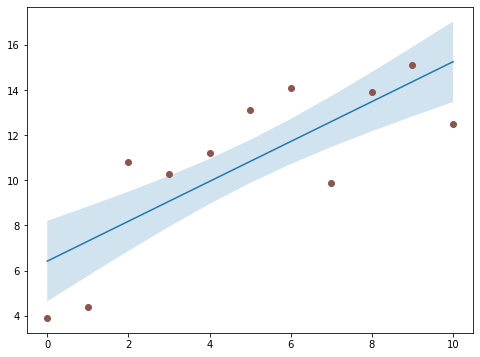

In [6]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')
print(y_err)

## Countour plots

In [30]:
var_rho = np.logspace(1,3,50)
var_ep = np.linspace(1,100,50)
var_sigma = 1.0/ var_rho
X0, Y = np.meshgrid(var_rho, var_ep)
X, Y = np.meshgrid(var_sigma, var_ep)
f = 1e7
w = 2*np.pi*f
GG = np.sqrt(1j * w * u0 *(X + 1j * w * e0 * Y))
g0 = 1j * w * np.sqrt(u0*e0)
Z = np.abs((g0 / GG) ** 2)

In [26]:
Z.shape

(50, 50)

[-4. -3. -2. -1.  0.]


Text(0, 0.5, 'verbosity coefficient')

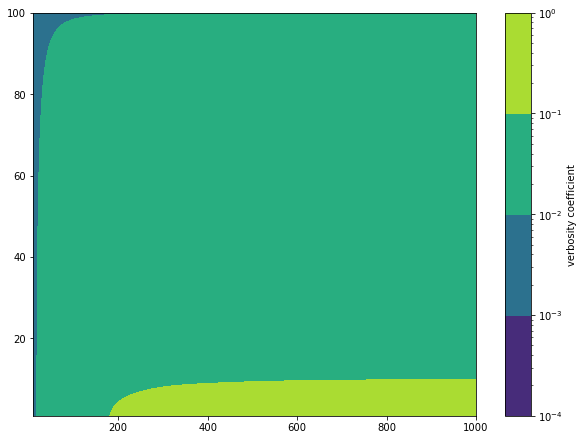

In [48]:
fig1, ax2 = plt.subplots(constrained_layout=True)
#CS = ax2.contourf(X0, Y, Z, 10, cmap=plt.cm.bone,locator=ticker.LogLocator())

lev_exp = np.arange(np.floor(np.log10(Z.min())-1),
                    np.ceil(np.log10(Z.max())+1))
levs = np.power(10, lev_exp)
print(lev_exp)
cs = ax2.contourf(X0, Y, Z, levs, norm=colors.LogNorm())

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(cs)
cbar.ax.set_ylabel('verbosity coefficient')